## Prepare a model for the HR department to predict the Attrition and give the insights from the data about the important factors associated with the attrition so that HR can take the corrective or previntive measures to stop or control the attrition.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv('HR_Employee_Attrition_Data.csv')

In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [33]:
# for rows and Columns
df.shape

(2940, 35)

In [34]:
# Identifying the Type of the Data
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [35]:
# Identifying the data weather the Data has Outliers and the Skeweness of the data
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<b>#Insites 1 By Looking at the data Many of the Data has not much Outliers</b>

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

<b>#Insites 2 By Looking at this data there are no missing values</b>

In [37]:
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


<b>#Insites 3 There are no Duplicated Value as well</b>

In [38]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.005175,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.025742,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.016464,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.020950,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.005175,-0.025742,0.016464,0.020950,NaN,1.000000,0.008712,0.017377,-0.003552,-0.009020,...,-0.034827,NaN,0.031226,-0.007047,0.011953,0.005370,-0.005779,-0.004427,-0.004575,-0.004716
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.008712,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.017377,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.003552,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.009020,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [3]:
df['Attrition'].value_counts()
# 16 % of Data is Attrition

No     2466
Yes     474
Name: Attrition, dtype: int64

<AxesSubplot:ylabel='Attrition'>

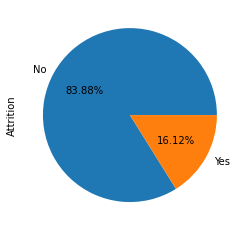

In [4]:
df['Attrition'].value_counts().plot.pie(autopct = '%1.2f%%')

In [5]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})
df['OverTime'] = df['OverTime'].map({'Yes':1, 'No':0})
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


### EDA with respect to Department

<AxesSubplot:xlabel='Department', ylabel='count'>

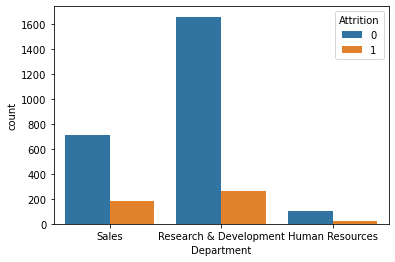

In [29]:
sns.countplot(x = df['Department'], data = df,hue='Attrition')

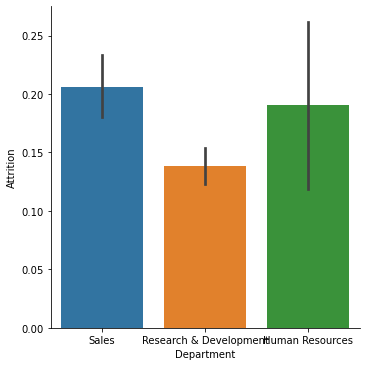

In [30]:
# df1 = df[df['Attrition'] == 1]
sns.catplot(x = 'Department', y = 'Attrition', data = df, kind = 'bar')

<b>#Insites 4  among the departements R&D is the Highest Attrition Rate next Comes Sales</b>

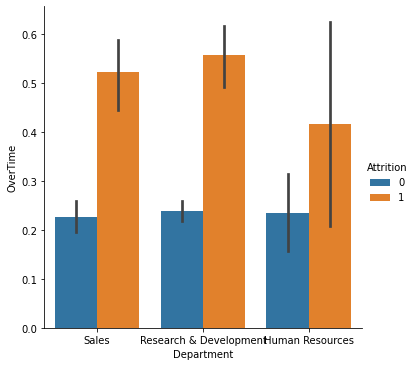

In [10]:
sns.catplot(x = 'Department', y = 'OverTime', data = df, kind = 'bar', hue = 'Attrition')

<AxesSubplot:xlabel='OverTime', ylabel='count'>

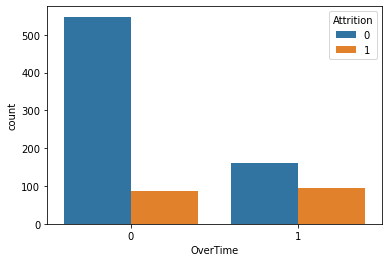

In [87]:
df1 = df[df['Department'] == 'Sales']
sns.countplot(x = df1['OverTime'], data = df1,hue='Attrition')

<AxesSubplot:xlabel='OverTime', ylabel='count'>

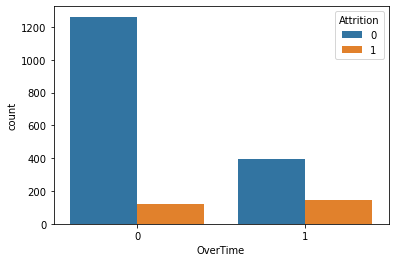

In [91]:
df1 = df[df['Department'] == 'Research & Development']
sns.countplot(x = df1['OverTime'], data = df1,hue='Attrition')

<AxesSubplot:xlabel='OverTime', ylabel='count'>

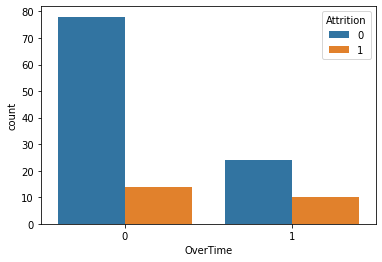

In [23]:
df1 = df[df['Department'] == 'Human Resources']
sns.countplot(x = df1['OverTime'], data = df1,hue='Attrition')

<b>#Insites 5 those who are working Over time are the once chances of Attrition Rate is High </b>

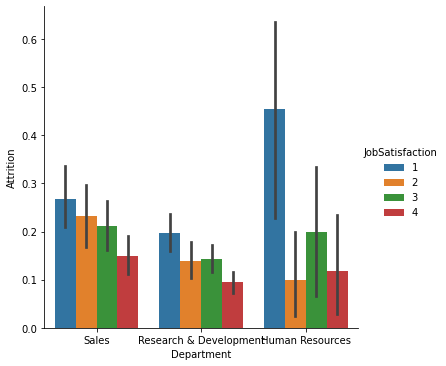

In [14]:
sns.catplot(x = 'Department', y = 'Attrition', data = df, kind = 'bar', hue = 'JobSatisfaction')

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

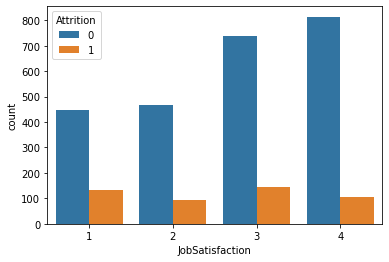

In [24]:
# sns.catplot(x = 'Department', y = 'Attrition', data = df, kind = 'bar', hue = 'JobSatisfaction')
sns.countplot(x = df['JobSatisfaction'], data = df,hue='Attrition')

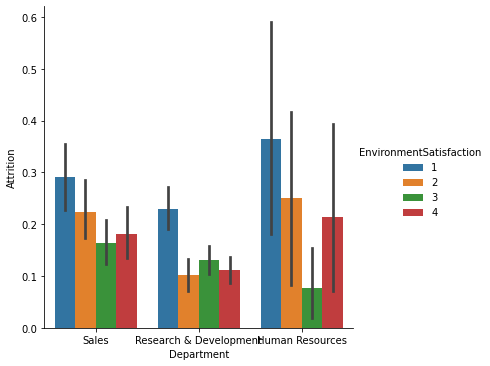

In [15]:
sns.catplot(x = 'Department', y = 'Attrition', data = df, kind = 'bar', hue = 'EnvironmentSatisfaction')

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

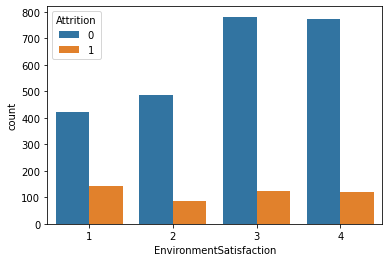

In [25]:
# sns.catplot(x = 'Department', y = 'Attrition', data = df, kind = 'bar', hue = 'EnvironmentSatisfaction')
sns.countplot(x = df['EnvironmentSatisfaction'], data = df,hue='Attrition')

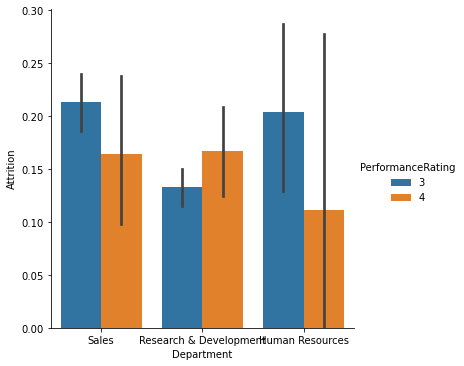

In [16]:
#PerformanceRating 
sns.catplot(x = 'Department', y = 'Attrition', data = df, kind = 'bar', hue = 'PerformanceRating')

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

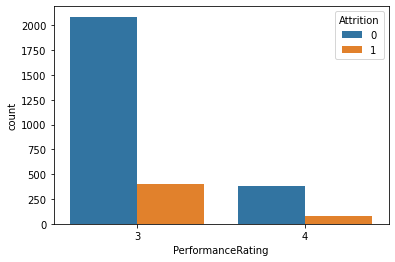

In [26]:
# sns.catplot(x = 'Department', y = 'Attrition', data = df, kind = 'bar', hue = 'PerformanceRating')
sns.countplot(x = df['PerformanceRating'], data = df,hue='Attrition')

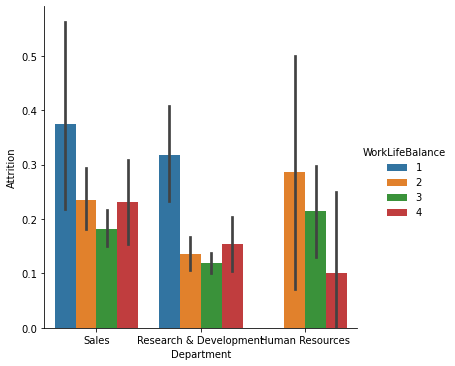

In [41]:
#WorkLifeBalance 
sns.catplot(x = 'Department', y = 'Attrition', data = df, kind = 'bar', hue = 'WorkLifeBalance')

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

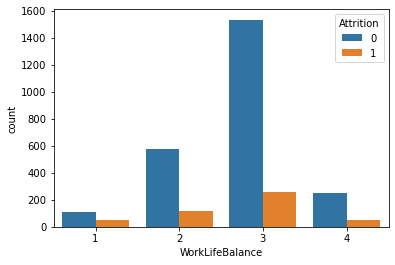

In [27]:
sns.countplot(x = df['WorkLifeBalance'], data = df,hue='Attrition')

<b>#Insites 6 Lesser the Work Life Balance chances of Attrition Rate is High</b>

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\melw

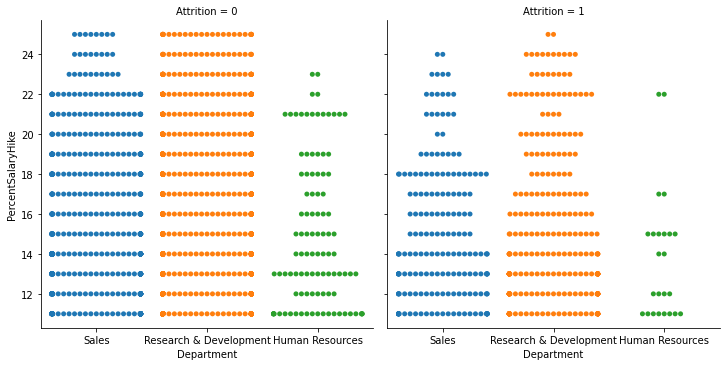

In [44]:
sns.catplot(x = 'Department', y = 'PercentSalaryHike', data = df, kind = "swarm", col = "Attrition")

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


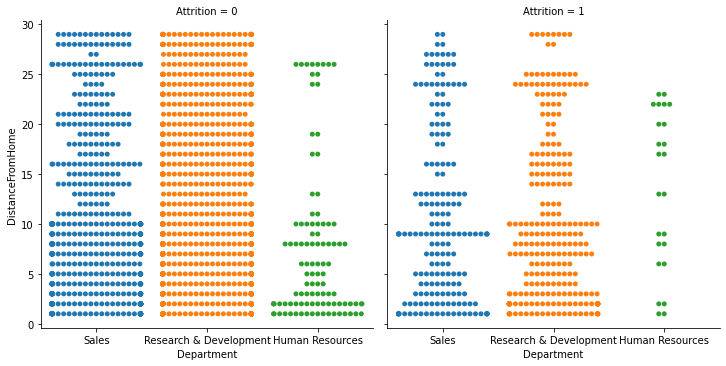

In [17]:
sns.catplot(x = 'Department', y = 'DistanceFromHome', data = df, kind = "swarm", col = "Attrition")

### CLEANING THE DATA

In [32]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3-Q1
        #Outlier Step
        outlier_step= IQR * 1  # Consedering 1.5 for 3mu which is 99% ,Consider 1 for only 2 mu which is 95 %
        #Detect outlier and their indices
        outlier_list_col = df[(df[c]<Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 0)
    
    return multiple_outliers

In [36]:
print(df.shape)
lst = [i for i in df.columns if i != 'Attrition']
# df = df.drop(detect_outliers(df,lst),axis=0).reset_index(drop = True) # "price",
print(df.shape)

(2940, 35)
(2940, 35)


In [62]:
# print(df['EmployeeCount'].isnumeric())
df['EmployeeCount'].std() == 0

True

In [6]:
def zerovariance_detection(data, features=None):
    columns = []
    zero_variance_variables = []
    columns = features if features != None else data.columns  
    for variable in columns:
        if data[variable].dtype in ['int32','int64','float32','float64']:
            if (data[variable].std() == 0):
                zero_variance_variables.append(variable)
    return zero_variance_variables            

In [7]:
### Removing the Zero Variance Column
# EmployeeCount, StandardHours
print(zerovariance_detection(df))
print(df.shape)
df = df.drop(zerovariance_detection(df),axis=1).reset_index(drop = True)
print(df.shape)

['EmployeeCount', 'StandardHours']
(2940, 35)
(2940, 33)


In [95]:
def coorilation_detection(data, features = None):
    corrmat = data.corr()
    columns = features if features != None else [ i for i in data.columns if (data[i].dtype in ['int32','int64','float32','float64'] ) ]
    coorilated_variables = {}
    for variable in columns:
        for variable1 in columns:
            if variable == variable1:
                continue
            elif abs(corrmat[variable][variable1]) >= 0.75:
                if ((variable not in coorilated_variables.keys()) and 
                    (variable1 not in coorilated_variables.keys())): 
                    coorilated_variables[variable] = []
                    coorilated_variables[variable].append(variable1)
                elif (variable1 not in coorilated_variables.keys()):  
                    coorilated_variables[variable].append(variable1)
    return coorilated_variables                
   

In [96]:
lst = [i for i in df.columns if (i != 'Attrition' and df[i].dtype in ['int32','int64','float32','float64'])]
coorilation_detection(df, lst)

{'JobLevel': ['MonthlyIncome', 'TotalWorkingYears'],
 'MonthlyIncome': ['TotalWorkingYears'],
 'PercentSalaryHike': ['PerformanceRating'],
 'YearsAtCompany': ['YearsInCurrentRole', 'YearsWithCurrManager']}

In [99]:
# among these data we need to remove some of the colums I decided to remove these
lst_to_remove = ['YearsInCurrentRole', 'YearsWithCurrManager','PercentSalaryHike','MonthlyIncome','JobLevel']
print(df.shape)
df = df.drop(lst_to_remove,axis=1).reset_index(drop = True)
print(df.shape)

(2940, 33)
(2940, 28)


In [101]:
lst = [i for i in df.columns if (i != 'Attrition' and df[i].dtype in ['int32','int64','float32','float64'])]
coorilation_detection(df, lst)
# now every coorilated data are removed

{}

### APPLYING ML MODEL

In [ ]:
DECISION TREE